In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns

# Load in various data info from mat file

In [2]:
data_filename = "data/EEG/EEG_session1_sub1_multigrasp_realMove.mat"
data = sio.loadmat(data_filename)

In [31]:
grasp_labels = data['mrk']['y'][0][0]
grasp_labels = grasp_labels.T
print(grasp_labels)

[[0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 ...
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]]


In [28]:
tmp_grasp_names = data['mrk']['className'][0][0][0]
grasp_names = []
for n in tmp_grasp_names:
    grasp_names.append(n[0])
print(grasp_names)

['Cylindrical', 'Spherical', 'Lumbrical', 'Rest']


In [37]:
event_times = data['mrk']['pos'][0][0][0]
print(event_times)

[  54152   64265   79397   89491  104656  114721  129814  139876  154989
  165060  180166  190235  205335  215408  230528  240599  255707  265779
  280885  290964  306085  316168  331270  341344  356453  366535  381646
  391746  406873  416963  432078  442165  457284  467371  482478  492571
  507695  517784  532918  543004  558147  568246  583352  593440  608556
  618643  633764  643843  658931  668978  684090  694177  709286  719370
  734499  744611  759726  769817  784952  795043  810153  820243  835355
  845436  860571  870687  885809  895906  911042  921124  936239  946322
  961463  971577  986694  996791 1011910 1021998 1037132 1047230 1062374
 1072472 1087617 1097710 1112854 1122938 1138065 1148160 1163288 1173390
 1188521 1198640 1213787 1223886 1239019 1249143 1264285 1274399 1289537
 1299631 1314790 1324885 1340031 1350136 1365269 1375387 1390544 1400646
 1415802 1425893 1441027 1451118 1466252 1476368 1491523 1501610 1516740
 1526867 1542008 1552110 1567239 1577338 1592469 16

In [42]:
eeg_fs = data['mrk']['fs'][0][0][0][0]
print(eeg_fs)

2500


In [56]:
num_chans = data['mnt']['x'][0][0].shape[0]
print(num_chans)

time_samples = data['ch1'].shape[0]
print(time_samples)

eeg_data = np.zeros( (num_chans, time_samples) )
for chan in range(num_chans):
    eeg_data[chan] = np.squeeze(data['ch'+str(chan+1)])

print(eeg_data.shape)

60
3854800
(60, 3854800)


# Creating Epochs

In [62]:
seconds = 1
epoched_eeg = np.zeros( (len(event_times), num_chans, seconds*eeg_fs) )

for i, et in enumerate(event_times):
    # print(e)
    epoched_eeg[i,:,:] = eeg_data[:,et:et+(1*eeg_fs)]

# Making sure things look reasonable

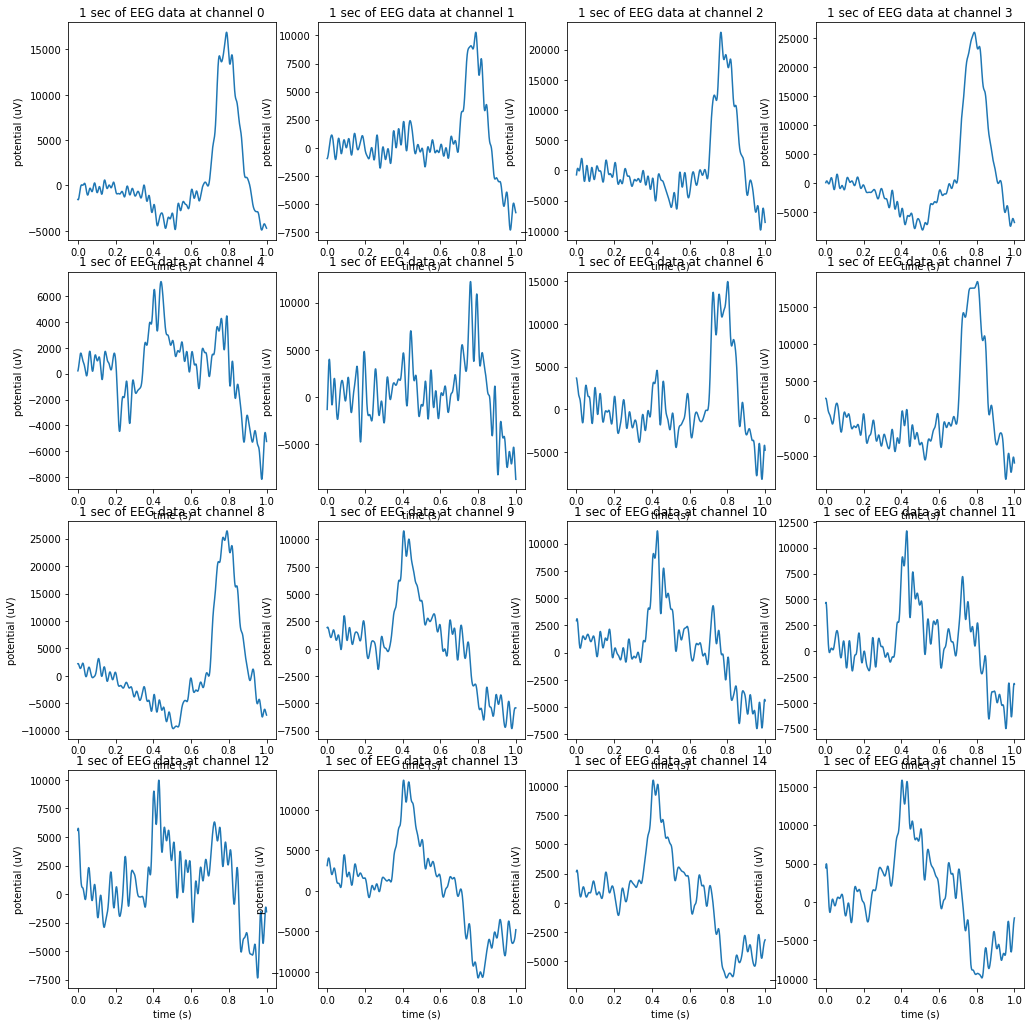

In [73]:
# plot for 10 seconds of data
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(14, 14)
fig.tight_layout()

elec = 0
for i in range(4):
    for j in range(4):
    # plt.figure(figsize=[10,4])
        axes[i, j].plot(np.linspace(0,1,eeg_fs*1),epoched_eeg[4,elec,0:eeg_fs*1])
        axes[i, j].set_xlabel('time (s)')
        axes[i, j].set_ylabel('potential (uV)')
        axes[i, j].set_title('1 sec of EEG data at channel ' + str(elec))
        elec += 1

Might be worth making sure that all event timings are within 1 second of each other for the window